1.IMPORTING LIBRARIES

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

%matplotlib inline

2.READING DATASET

In [133]:
dataset=pd.read_csv('/content/Data.csv')

3.ANALYZE THE DATA

In [134]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
dataset.drop(["Serial No."],axis=1,inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


4.HANDLING THE MISSING VALUES

In [28]:
dataset.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [30]:
dataset.fillna(dataset.mean(),inplace=True)

LABEL ENCODING

In [67]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_y=LabelEncoder()
dataset['Country']=labelencoder_y.fit_transform(dataset['Country'])

5.SPLITTING DEPENDENT AND INDEPENDENT COLUMNS

In [99]:
x=dataset.iloc[:,0:3].values
x.shape

(10, 3)

In [132]:
y=dataset.iloc[:,3].values
y.shape

(10,)

6.DATA VISUALIZATION

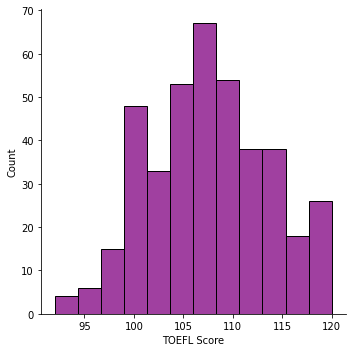

In [135]:
sns.displot(data["TOEFL Score"], color='purple')

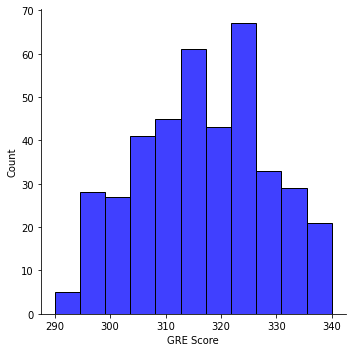

In [122]:
sns.displot(data["GRE Score"], color='blue')

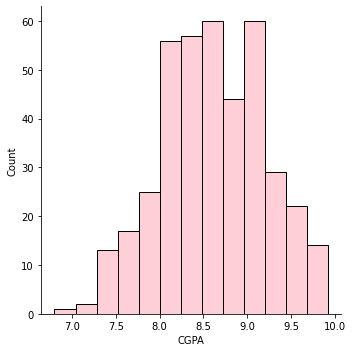

In [123]:
sns.displot(data["CGPA"], color='PINK')

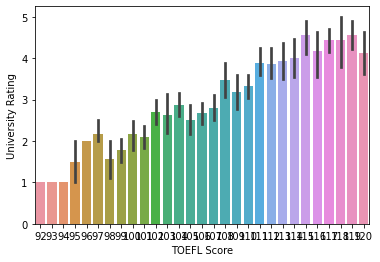

In [116]:
sns.barplot(x=data['TOEFL Score'],y=data['University Rating'])

ONE HOT ENCODING

In [131]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencoder = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
X=onehotencoder.fit_transform(x).toarray()
X=X[:,1:]

7.SPLITTING THE DATASET INTO TRAIN SET AND TESTING SET

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape

(8, 11)